In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("files/Training.csv")
data.head()

test = pd.read_csv("files/Testing.csv", index_col=[0])
test.sample()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis,symptoms
25,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Hyperthyroidism,11


In [3]:
data.shape

(306, 135)

In [4]:
data["prognosis"] = data["prognosis"].apply(lambda x: x.replace("Paralysis (brain hemorrhageH", "Paralysis (brain hemorrhage)"))

In [5]:
new_data = data.copy()
for i in new_data.columns :
    if new_data[i].dtype=='object':
        print(i)

prognosis


In [6]:
new_data["prognosis"].value_counts()

Dengue                           10
Hepatitis D                      10
Chicken pox                      10
Migraine                         10
Diabetes                          9
Hypoglycemia                      9
Hepatitis B                       9
Hepatitis A                       9
Jaundice                          9
Hyperthyroidism                   9
Hepatitis E                       9
Common Cold                       9
Pneumonia                         9
Tuberculosis                      9
Typhoid                           9
Chronic cholestasis               8
Malaria                           8
Hypothyroidism                    8
Alcoholic hepatitis               8
Varicose veins                    8
Peptic ulcer disease              7
Paroxysmal Positional Vertigo     7
Osteoarthritis                    7
Psoriasis                         7
Hepatitis C                       7
GERD                              7
Bronchial Asthma                  7
Hypertension                

In [7]:
dis = new_data.prognosis.unique()
dis

array(['AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis',
       'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox',
       'Chronic cholestasis', 'Common Cold', 'Covid', 'Dengue',
       'Diabetes ', 'Dimorphic hemorrhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D',
       'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthritis', 'Paralysis (brain hemorrhage)',
       'Paroxysmal Positional Vertigo', 'Peptic ulcer disease',
       'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid',
       'Urinary tract infection', 'Varicose veins'], dtype=object)

In [8]:
col = new_data.columns
new_data["symptoms"] = new_data[col].sum(axis=1)
new_data.sample()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis,symptoms
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Alcoholic hepatitis,6


In [9]:
new_data.shape

(306, 136)

In [10]:
num=[i for i in range(len(dis))]
dic=dict(zip(dis,num))
print(dic)

{'AIDS': 0, 'Acne': 1, 'Alcoholic hepatitis': 2, 'Allergy': 3, 'Arthritis': 4, 'Bronchial Asthma': 5, 'Cervical spondylosis': 6, 'Chicken pox': 7, 'Chronic cholestasis': 8, 'Common Cold': 9, 'Covid': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemorrhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis A': 19, 'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23, 'Hypertension ': 24, 'Hyperthyroidism': 25, 'Hypoglycemia': 26, 'Hypothyroidism': 27, 'Impetigo': 28, 'Jaundice': 29, 'Malaria': 30, 'Migraine': 31, 'Osteoarthritis': 32, 'Paralysis (brain hemorrhage)': 33, 'Paroxysmal Positional Vertigo': 34, 'Peptic ulcer disease': 35, 'Pneumonia': 36, 'Psoriasis': 37, 'Tuberculosis': 38, 'Typhoid': 39, 'Urinary tract infection': 40, 'Varicose veins': 41}


In [11]:
new_data.replace({'prognosis':dic}, inplace=True)
test.replace({'prognosis':dic}, inplace=True)
new_data.head(3)

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis,symptoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [12]:
import seaborn as sns

In [13]:
X=new_data.drop(columns="prognosis")
y=new_data.prognosis

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test , y_train, y_test = X, test.drop("prognosis", axis=1), y, test.prognosis

In [16]:
import plotly.graph_objects as go

In [17]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
disease_count = new_data["prognosis"].value_counts().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(
    y=disease_count["index"],
    x=disease_count["prognosis"],
    orientation='h'
))

fig.update_layout( template=temp, title="Types of Disease", height=1000, width=900)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
X_test.shape

(42, 135)

<AxesSubplot: >

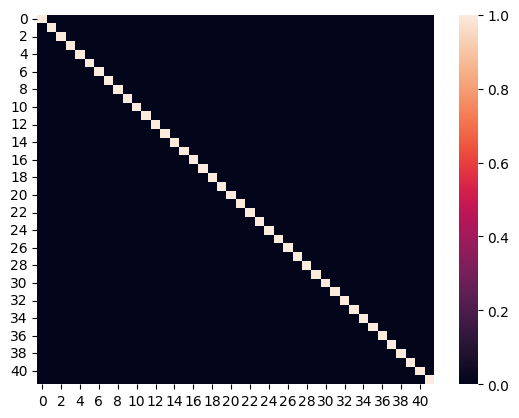

In [21]:
conf_matrix = confusion_matrix(y_test,y_pred) 
df_conf = pd.DataFrame(conf_matrix)
sns.heatmap(df_conf)

In [22]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

In [35]:
x = np.random.randint(0,2,135)
x[-1]=6
disease = model.predict([x])
y[disease[0]]

3

In [25]:
def showdis(i):
    for key,val in dic.items():
        if val==i:
            print(key)

In [26]:
showdis(y[disease[0]])

Acne


In [27]:
from joblib import dump
dump(model, "model.joblib")

['model.joblib']

In [28]:
from joblib import dump
dump(dic, "disease.joblib")

['disease.joblib']